# Oven heat transfer
The goal of this code is to determine if the current oven controller code sufficiently controls the oven temperature if parts of different weights and sizes are simultaneously placed inside the oven. 

### Tools and parts that go into oven 1
The options are:
 - inner bypass valve tool
 - aluminum table
 - egg table tool
 - radome tool

### Material Properties
In order to determine the convection coefficient (h) for the materials, Nussent number relations in heat convection were used. the relationship for forced convection laminar flow over a flat plate:
\begin{equation}
    Nu=0.664Re^{0.5}Pr^{\frac{1}{3}}
\end{equation}

forced convection over a sphere:
\begin{equation}
    Nu=2+(0.4Re^{0.5}+0.06Re^{2/3})Pr^{0.4}{(\frac{\mu_{\infty}}{\mu_s})}^{0.25}
\end{equation}

Where Nu is the Nusselt number and is defined as:
\begin{equation}
    Nu=\frac{hL_c}{k}
\end{equation}

and Re is the Reynolds number:
\begin{equation}
    Re=\frac{\rho VL_c}{\mu}=\frac{VL_c}{\nu}
\end{equation}

and Pr is the Prandtl number:
\begin{equation}
    Pr=\frac{\nu}{\alpha}=\frac{\mu c_p}{k}
\end{equation}

The speed of the air circulating in the oven was taken as 2 m/s

#### Characteristic length 
The characteristic length of an object varies depending on the shape of the object. For flat rectangular surfaces, both the width and lengh are on the same order of magnitude (approximately) so it is not enough to simply use the smallest length as the characteristic length.
##### Inner Bypass:
\begin{equation}
    L_c=\frac{w*l}{2(w+l)}
\end{equation}
http://people.csail.mit.edu/jaffer/SimRoof/Convection/#Characteristic%20Length

(approximate figure as flat surface)
Use with Nusselt equation for forced convection over horizontal flat plate
##### aluminum table:
\begin{equation}
    L_c=\frac{w*l}{2(w+l)}
\end{equation}
Use with Nusselt equation for forced convection over horizontal flat plate
##### IMP Fairing:
\begin{equation}
    L_c=D
\end{equation}
Use with Nusselt equation for forced convection over sphere
##### radome tool:
\begin{equation}
    L_c=D
\end{equation}
(approximate the figure as a spherical shape)
Use with Nusselt equation for forced convection over sphere (outside and inside)

## Additional parts going into the oven
#### Inner Bypass valve
The material that goes into the tool consists of:
 - RM-3004 resin
 - 195GSM plain weave carbon fibre
 - breather (polyester)
 - solid release (PTFE coated)
 - vacuum bag
#### Aluminum table
For the time being I have no idea if anything goes on this tool or a specific material, will leave it blank.
#### IMP Fairing
The material that goes into the tool consists of:
 - laminate: AX-3112T-7781
 - vacuum bag
 - perforated release
 - peel ply
 - breather

#### Radome
material on the inside
 - laminate: AX-3112T-7781
 - peel ply: SRG 52008
 - perforated release
 - breather
 - vacuum bag

material on the outside
 - peel ply (will ignore this layer for simulation)
 
density, thermal conductivity, and specific heat capacity all had to be found experimentally.

Thermal Conductivity:

3 layups for the each tool were stacked on top of each other, and a thermocouple was placed at the bottom of the layup. The stacks were placed in a vacuum bag, and vacuumed. A heating blanket was heated until 100 degrees celsius. The blanket was placed on top of a steel block, which was sitting on top of the layup stack. At the bottom, aluminum blocks acted as a heat sink for the heat passing through the test set up. Thermocouples were placed between the heating blanket and the steel block, and between the steel block and the layup stack. After the entire configuration had reached steady state (less than 1 degree change per minute), the temperatures were used along with the thermal properties of the steel to find the thermal conductivity:

\begin{equation}
    k_x\frac{T_{top x}T_{bottom x}}{thickness_x}=k_{steel}\frac{T_{top steel}-T_{bottom steel}}{thickness_{steel}}
\end{equation}

Specific Heat Capacity:

A thermocouple was sandwiched between 2 stacks of the layup material, and the entire assembly was vacuumed. Water was brought to a temperature of about 70 degrees celsius, and kept on the hot plate to maintain this temperature. The layup assembly was placed into the water for 30 seconds, with the initial temperature and final temperature of the assembly after 30 seconds being recorded. 

To calculate the thermal convective coefficient for the Biot number, the velocity of the water was approximated to 0.5 m/s, as it was moving but very slowly. The data was used to calculate c_p:

\begin{equation}
    Bi=\frac{h L_c}{k}
\end{equation}

\begin{equation}
    \frac{T_o-T_{\infty}}{T_i-T_{\infty}}=A_1e^{{\lambda}^2{\tau}}
\end{equation}

\begin{equation}
    \tau=\frac{\alpha t}{L^2}=\frac{kt}{\rho c_p L^2}
\end{equation}

| Part | Size   |
|------|--------|
|inner bypass valve tool|10x1.905 cm|
|aluminum table|10x2 cm|
|IMP fairing tool|10x1 cm|
|radome tool|1x10 cm|

*Note: these cross-sections are taken at an arbitrary inner part of each tool, ultimately due to their thin cross sections the heat transfer through the thickness is small relative to the rest of their sides

*Note: the thickness of the radome tool is an approximation

## PID control algorithm

\begin{equation}
    u(t)= u_{bias} + k_ce(t) + \frac{k_c}{\tau_I}\int_{0}^{t}e(t)dt - k_c\tau_D\frac{dPV}{dt}
\end{equation}

Where the second term is the proportional, the third term is the integrator, and the fourth term is the differentiator.

First step:
Implement PID loop that is currently used in the controller for this code. If the result shows that this code functions well enough to regulate the temperature of a variety of parts placed in the oven, then this controller is good to go. Otherwise, adjustments to the PID strategy (i.e. using average thermocouple temperatures, or changing the proportionality constants of the PID) must be made. 

The steps to doing PID control:
 1. Place thermocouples along several points on the parts
 2. determine equation describing the dynamic system (typically DE)
 3. determine constant values for the P, I, and D terms
 4. determine error in obtained signal (perhaps its the difference between desired and obtained value)
 5. Sum up all previous errors for I term
 6. Differentiate error for D term (probably have to do this with numerical methods)
 7. Determine overall disturbance by summing up P, I, D
 8. Apply disturbance to heater input
 
notes about k_p (proportional gain):
 - too small means it will take a long time to reach desired value
 - too large means it could off shoot too much, and lead to an unstable system
 - larger value also means more fast convergence to desired value
 
The goal of this PID loop is to determine what the power output of the heater must be in order to bring the lowest temperature to the desired temperature. Ultimately however, we want to ensure that if the air temperature becomes higher than the setpoint, that it will not overheat any of the parts in the process. Although the heater operates with PWM, in order to simplify the calculations the oven is assumed to provide power in a continuous fashion. The maximum power of the oven is 6000 W, and so if the PID output indicates that a higher power should be provided, it will be truncated at 6000 W. 

Approximate relationship between air temperature and heater:
Assumptions:
 - maximum heater power is 6000 W
 - volume of oven is 2.6 x 2.45 x 4.2 m^3
 - lumped system i.e. temperature of air inside the oven is uniform

\begin{equation}
    T_{air}=\frac{Q_{heater}}{m_{air}c_{p, air}} + T_i
\end{equation}

#### Determining PID stability

In order for the loop to work, gain values for the proportional, integral, and derivative need to be found. The Ziegler Nichols method prevents us from doing this completely brute force. The gain values are specific to each system, and once found will make the system stable.

Ziegler Nichols:

|  | k_{p}  |  k~i~ |  k~d~ |
|--|-------|-------|-------|
|  |0.6 k_u |2 k_p/P_u|k_p P_u/8|

where k_u is the ultimate gain at which output of the loop starts to oscillate.

### Solve Finite Difference Model
The transient 2-dimensional heat conduction equation is used to solve for the temperatures of the two blocks with respect to time. Convection and heat flux are also accounted for. Several assumptions were made in order to complete the simulation.
 - bodies are far enough apart that their respective temperatures do not affect each other
 - bodies are representative of small sections within the overall tool - characteristic length is calculated with the overall dimensions, 
 - the temperature of the oven is unaffected by the bodies entering the oven 
 - parts experience convection as a result of air movement inside of the oven
 - heat flux is accounted for through the convective heat transfer coefficient
 - uniform heat flux/convection across the sides of the part
 - 2D heat transfer (even though the bodies are in 3D)
 - airflow over the surface is laminar

The transient finite difference model was built for rectangular regions, thus any cross-sections that are not perfectly rectangular will be approximated with a rectangular cross section.

### Library Inputs

In [268]:
import numpy as np
#import prettytable as pt #for presenting organized tables
#import pandas as pd #for data analysis
import math
import sys
from IPython.display import display, Math, Latex #for graphing with matplotlib
import chtf as chtf #Comtek heat transfer function
%matplotlib inline
import matplotlib.pyplot as plt
import time #to create a timer

In [269]:
# #set plot parameters
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi']
plt.rcParams['figure.autolayout']=False
plt.rcParams['figure.figsize']=10, 6
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=20
plt.rcParams['font.size']=16
plt.rcParams['lines.linewidth']=2.0
plt.rcParams['lines.markersize']=8
plt.rcParams['legend.fontsize']=14

# plt.rcParams['text.usetex']=True #allows you to use LaTeX in MatPlotLib
# # plt.rcParams['font.family']="serif"
# plt.rcParams['font.serif']="cm"

### Material Properties

In [270]:
#properties of air circulating inside the oven at 120 degrees
air_rho=0.8977 #[kg/m^3]
air_c=1011 #[J]
air_speed=2 #[m/s]
air_nu=2.522e-5 #[m^2/s]
air_k=0.03235 #[W/m-K]
air_Pr=0.7073
air_beta=0.002545 #[1/K]
air_mu_inf= 2.264e-5 #[kg/m-s] at 120 degrees (temp of oven)
air_mu_s=1.825e-5 #[kg/m-s] at 20 degrees (surface temp of part)
m_air=35 #[kg]

#material properties of mild steel
mild_steel = chtf.ThermalMaterial()
mild_steel.rho= 7830.0
mild_steel.c= 434.0
mild_steel.k= 64.0
mild_steel_h= 12.26

#material properties of inner bypass valve tool
steel_4140 = chtf.ThermalMaterial()
steel_4140.rho=7850. #[kg/m^3]
#https://www.azom.com/article.aspx?ArticleID=6769
steel_4140.c=473. #[J/kg-K]
#http://www.efunda.com/materials/alloys/alloy_steels/
#show_alloy.cfm?ID=AISI_4140&prop=all&Page_Title=AISI%204140
steel_4140.k=42.6 #[W/m-K]
#https://www.azom.com/article.aspx?ArticleID=6769
steel_4140_l=0.36*1.12/(2*(0.36+1.12))
steel_4140_Re=air_speed*steel_4140_l/air_nu
steel_4140_Nu=0.664*(steel_4140_Re**0.5)*(air_Pr**(1/3))
steel_4140_h=steel_4140_Nu*air_k/steel_4140_l

#material properties of aluminum (aluminum table)
aluminum = chtf.ThermalMaterial()
aluminum.rho=2700 #[kg/m^3]
aluminum.c=900 #[J/kg-K]
aluminum.k=205 #[W/m-K]
aluminum_l=1.78*1.02/(2*(1.78+1.02))
# http://people.csail.mit.edu/jaffer/SimRoof/Convection/#Characteristic%20Length 
aluminum_Re=air_speed*aluminum_l/air_nu
aluminum_Nu=0.664*(aluminum_Re**0.5)*(air_Pr**(1/3))
aluminum_h=aluminum_Nu*air_k/aluminum_l

#material properties of carbon fibre (radome tool)
#Note: the average properties of several composites was used
carbon_fibre = chtf.ThermalMaterial()
carbon_fibre.rho=1659 #[kg/m^3]
#http://www.performance-composites.com/carbonfibre/mechanicalproperties_2.asp
carbon_fibre.c=1130 #[J/kg-K]
#http://www.matweb.com/search/datasheettext.aspx?
#matguid=39e40851fc164b6c9bda29d798bf3726
carbon_fibre.k=78.8 #[W/m-K]
#http://www.matweb.com/search/datasheettext.aspx?
#matguid=39e40851fc164b6c9bda29d798bf3726
carbon_fibre_l=0.4
carbon_fibre_Re=air_speed*carbon_fibre_l/air_nu
carbon_fibre_Nu=2+(0.4*carbon_fibre_Re**(0.5)+0.06*carbon_fibre_Re**(2/3))*air_Pr**(0.4)*((air_mu_inf/air_mu_s)**(0.25))
carbon_fibre_h=carbon_fibre_Nu*air_k/carbon_fibre_l

#material properties of fibre-glass (IMP Faring)
fibre_glass = chtf.ThermalMaterial()
fibre_glass.rho=2550 #[kg/m^3]
fibre_glass.c=800 #[J/kg-K]
fibre_glass.k=1.3 #[W/m-K]
#https://www.azom.com/properties.aspx?ArticleID=764
fibre_glass_l=0.37 #diameter of "sphere" 
fibre_glass_Re=air_speed*fibre_glass_l/air_nu
fibre_glass_Nu=2+(0.4*fibre_glass_Re**(0.5)+0.06*fibre_glass_Re**(2/3))*air_Pr**(0.4)*((air_mu_inf/air_mu_s)**(0.25))
fibre_glass_h=fibre_glass_Nu*air_k/fibre_glass_l

In [271]:
#layup material properties

bypass_l=0.36*1.12/(2*(0.36+1.12))
bypass_Re=air_speed*bypass_l/air_nu
bypass_Nu=0.664*(bypass_Re**(0.5))*air_Pr**(1/3)
bypass_h=bypass_Nu*air_k/bypass_l

IMP_l=0.37
IMP_Re=air_speed*IMP_l/air_nu
IMP_Nu=2+(0.4*IMP_Re**(0.5)+0.06*IMP_Re**(2/3))*air_Pr**(0.4)*((air_mu_inf/air_mu_s)**(0.25))
IMP_h=IMP_Nu*air_k/IMP_l

radome_l=0.4
radome_Re=air_speed*radome_l/air_nu
radome_Nu=2+(0.4*radome_Re**(0.5)+0.06*radome_Re**(2/3))*air_Pr**(0.4)*((air_mu_inf/air_mu_s)**(0.25))
radome_h=radome_Nu*air_k/radome_l

bypass_layup=chtf.ThermalMaterial()
bypass_layup.rho=224.46 #value obtained experimentally
bypass_layup.c=429.88 #value obtained experimentally
bypass_layup.k=4.569 #[W/m-K] obtained this value experimentally
bypass_layup_t=0.0016764 #[m]

IMP_layup=chtf.ThermalMaterial() #same layup for radome
IMP_layup.rho=270.63 #value obtained experimentally
IMP_layup.c=419.35 #value obtained experimentally
IMP_layup.k=6.317 #[W/m-K] obtained this value experimentally
IMP_layup_t=0.0020193 #[m]

bypass_laminate=chtf.ThermalMaterial() #RM-3004 + 195 GSM --5 full plies
bypass_laminate.rho=1659 #[kg/m^3]
bypass_laminate.c=1130 #[J/kg-K]
bypass_laminate.k=78.8 #[W/m-K]
bypass_laminate_t=0.001778 #[m]

IMP_laminate=chtf.ThermalMaterial()  #AX-3112T-7781 --8 full plies
IMP_laminate.rho=2550 #[kg/m^3]
IMP_laminate.c=800 #[J/kg-K]
IMP_laminate.k=1.3 #[W/m-K]
IMP_laminate_t=0.002032 #[m]

radome_laminate=chtf.ThermalMaterial()  #AX-3112T-7781 --4 full plies
radome_laminate.rho=2550 #[kg/m^3]
radome_laminate.c=800 #[J/kg-K]
radome_laminate.k=1.3 #[W/m-K]
radome_laminate_t=0.001016 #[m]

#will ignore layer of peel ply on outside of radome tool

In [272]:
#dimensions of tools layout
x1=0.
x2=0.0075
x3=0.01
x4=0.0175
x5=0.02
x6=0.0275
x7=0.03
x8=0.0375

y1=0.
y2=0.01095
y3=0.02
y4=0.01
y5=0.0075

In [273]:
q_bottom=0.
T_initial=20 #initial temperature of parts before entering oven
T_max=120 #max temperature the oven reaches
hours=4 #amount of time part spends in oven
merge_tol=0.000000005 #tolerance to apply when searching for existing nodes
save_nth_step=4000
time_step=0.0003 
mesh_res=1
ramp_up = 20 #[minutes]
ramp_down = 20 #[minutes]

model2 = chtf.TransientFiniteDifferenceModel()

#inner bypass
model2.add_rectangular_region(steel_4140, 
                             np.array([x1, y1]), 
                             np.array([x2, y2]),
                             int(1/mesh_res), int(20/mesh_res), 
                             merge_tol)
#laminate
model2.add_rectangular_region(bypass_laminate, 
                             np.array([x1, y2]),
                             np.array([x2, y2+bypass_laminate_t]),
                             int(1/mesh_res), int(3/mesh_res),
                             merge_tol / 2)
#layup
model2.add_rectangular_region(bypass_layup,
                             np.array([x1, y2+bypass_laminate_t]), 
                             np.array([x2, y2+bypass_laminate_t+bypass_layup_t]), 
                             int(1/mesh_res), int(3/mesh_res), 
                             merge_tol / 2)

#aluminum table
model2.add_rectangular_region(aluminum, 
                             np.array([x3, y1]), 
                             np.array([x4, y3]),
                             int(1/mesh_res), int(20/mesh_res), 
                             merge_tol)

#IMP Fairing
model2.add_rectangular_region(fibre_glass, 
                         np.array([x5, y1]), 
                         np.array([x6, y4]),
                         int(1/mesh_res), int(20/mesh_res), 
                         merge_tol)
#laminate
model2.add_rectangular_region(IMP_laminate,
                            np.array([x5, y4]),
                            np.array([x6, y4+IMP_laminate_t]),
                            int(1/mesh_res), int(4/mesh_res), 
                            merge_tol/4)

#layup
model2.add_rectangular_region(IMP_layup, 
                             np.array([x5, y4+IMP_laminate_t]), 
                             np.array([x6, y4+IMP_laminate_t+IMP_layup_t]),
                             int(1/mesh_res), int(4/mesh_res),
                             merge_tol/4)
#Radome
model2.add_rectangular_region(carbon_fibre, 
                             np.array([x7, y1]), 
                             np.array([x8, y5]),
                             int(20/mesh_res), int(1/mesh_res), 
                             merge_tol)

#laminate
model2.add_rectangular_region(radome_laminate,
                              np.array([x8, y1]),
                              np.array([x8+radome_laminate_t, y5]),
                              int(2/mesh_res), int(1/mesh_res),
                              merge_tol/2)

#layup
model2.add_rectangular_region(IMP_layup,
                              np.array([x8+radome_laminate_t, y1]), 
                             np.array([x8+radome_laminate_t+IMP_layup_t, y5]), 
                             int(4/mesh_res), int(1/mesh_res), 
                             merge_tol/2)

### PID Control

In [274]:
#chose top middle for each part because it is the most realistic (thermocouples are placed on surface)

e_1=model2.find_node_index_at_point(x2/2, y2+bypass_laminate_t+bypass_layup_t)
e_2=model2.find_node_index_at_point(x3+((x4-x3)/2), y3)
e_3=model2.find_node_index_at_point(x5+((x6-x5)/2), y4+IMP_laminate_t+IMP_layup_t)
e_4=model2.find_node_index_at_point(x8, y5/2)

# #this function simulates an approximate PWM of the oven heater
# def PWM(time_index, PID_output):
#     max_power_output= 6000 # [W] output of oven 1
#     min_power_output=0.
#     #need to convert PID output into some sort of time variable that determines how long the max power output should be on for
#     #use ratios by assuming PID output is a percentage - THIS ONLY WORKS IF USING PROPORTIONAL CONTROL 
#     if PID_output > 1: #to ensure that it doesn't go past the max heater power
#         PID_output=1
#     avg_power_output = (max_power_output*PID_output*time_index)+(min_power_output*time_index*(1-PID_output))
#     return avg_power_output

model2.pid_time_index = -1.
model2.pid_integral = 0.
model2.pid_error_prior = 0.
model2.pid_output_temp = 0.
model2.pid_time_prior = 0.
model2.pid_error_prior = 0.
model2.pid_Q_heater = 0.
model2.oven_temp_output = np.zeros(int(np.ceil((hours * 3600 / time_step)/10)+2), dtype=np.float64)
model2.pid_time =  np.zeros(int(np.ceil((hours * 3600 / time_step)/10)+2), dtype=np.float64)

def air_temp(time, time_index, last_solution, model):
    if time_index == model.pid_time_index:
        return model.pid_output_temp
    
    model.pid_time_index = time_index
    
    t=time
    k_P = 4 # Play around with this
    k_I = 4 # play around with this
    k_D = 4 # play around with this
    
    if time_index == 0:
        T1 = T_initial
        T2 = T_initial
        T3 = T_initial
        T4 = T_initial
        lowest_temp = T_initial
    
    else:
        T1 = last_solution[e_1]
        T2 = last_solution[e_2]
        T3 = last_solution[e_3]
        T4 = last_solution[e_4]
        lowest_temp = min(T1, T2, T3, T4) # finding lowest temperature to use for PID

    if time < ramp_up*60: #ramp up
        ideal_air_temp = T_initial + (T_max - T_initial) * time / (ramp_up * 60) 
    elif time > hours*3600 - ramp_down*60: #ramp down
        ideal_air_temp = - (T_max - T_initial) * time / (ramp_down * 60) +T_initial + 60*hours*(T_max-T_initial)/ramp_down
    else:
        ideal_air_temp = T_max
  
    error = ideal_air_temp-lowest_temp
    model.pid_integral = model.pid_integral + error * time_step  # accounting for past errors
    derivative = (error - model.pid_error_prior) / time_step # accounting for rate of change of error
    model.pid_error_prior = error
    
    PID_output = (k_P*error) + (k_D*derivative) + (k_I*model.pid_integral) 

    #new_heater_power = PWM(time_index, PID_output)
    k_oven = 0.475 #[W/m-K] 
    oven_SA = (2.6 * 2.45) + (2.6 * 4.2) + (2 * 2.45 * 4.2) # surface area of oven
    new_heater_power = 5*PID_output # 5 was sort of arbitrary
    if new_heater_power > 6000:
        new_heater_power = 6000 
    rate_heat_loss = k_oven * oven_SA * (model.pid_output_temp - 25)/0.3 #heat loss through walls
    total_power_output = new_heater_power - rate_heat_loss
    
    model.pid_Q_heater = model.pid_Q_heater + total_power_output * time_step 
    if model.pid_Q_heater < 0:
        model.pid_Q_heater = 0
    oven_temp = model.pid_Q_heater/(m_air*air_c)+T_initial
    model.pid_output_temp = oven_temp
    
    if time_index % 3000 == 0: #saving every 3000th step to lower memory usage
        new_index = time_index//3000
        model2.oven_temp_output[new_index] = oven_temp
        model2.pid_time[new_index] = time
    
    return oven_temp

In [275]:
# run this for reference graph

def ideal_air_temp (time, time_index, last_solution, model): 
    if time < ramp_up*60:
        desired_temp = T_initial + (T_max - T_initial) * time / (ramp_up * 60) 
    elif time > hours*3600 - ramp_down*60:
        desired_temp = - (T_max - T_initial) * time / (ramp_down * 60) +T_initial + 60*hours*(T_max-T_initial)/ramp_down
    else:
        desired_temp = T_max
    return (desired_temp)

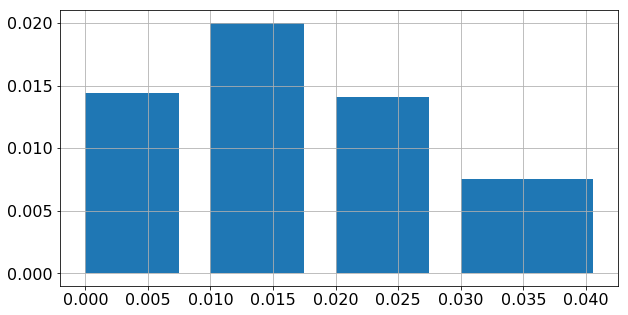

In [276]:
#show the layout of parts
p=model2.plot_mesh(show_connections=False)
ax=p.gca()

#### Inner Bypass Valve

In [277]:
model2.add_boundary_flux(np.array([x1, y1]), 
                        np.array([x1, y2+bypass_laminate_t+bypass_layup_t]), 
                        merge_tol, q_bottom)
model2.add_boundary_flux(np.array([x2, y1]), 
                        np.array([x2, y2+bypass_laminate_t+bypass_layup_t]), 
                        merge_tol, q_bottom)
model2.add_boundary_flux(np.array([x1,y1]), 
                        np.array([x2, y1]), 
                        merge_tol, q_bottom)
model2.add_boundary_convection(np.array([x1, y2+bypass_laminate_t+bypass_layup_t]), 
                              np.array([x2, y2+bypass_laminate_t+bypass_layup_t]), 
                              merge_tol, bypass_h, air_temp)

#### Aluminum Table

In [278]:
model2.add_boundary_flux(np.array([x3,y1]), 
                        np.array([x3, y3]), 
                        merge_tol, q_bottom)
model2.add_boundary_flux(np.array([x4,y1]), 
                        np.array([x4, y3]), 
                        merge_tol, q_bottom)
model2.add_boundary_convection(np.array([x3, y1]), 
                              np.array([x4, y1]), 
                              merge_tol, aluminum_h, air_temp)
model2.add_boundary_convection(np.array([x3, y3]), 
                              np.array([x4, y3]), 
                              merge_tol, aluminum_h, air_temp)

#### IMP Fairing

In [279]:
model2.add_boundary_flux(np.array([x5, y1]), 
                        np.array([x5, y4+IMP_laminate_t+IMP_layup_t]), 
                        merge_tol, q_bottom)
model2.add_boundary_flux(np.array([x6, y1]), 
                        np.array([x6, y4+IMP_laminate_t+IMP_layup_t]), 
                        merge_tol, q_bottom)
model2.add_boundary_convection(np.array([x5, y1]), 
                              np.array([x6, y1]), 
                              merge_tol, fibre_glass_h, air_temp)
model2.add_boundary_convection(np.array([x5, y4+IMP_laminate_t+IMP_layup_t]),
                               np.array([x6, y4+IMP_laminate_t+IMP_layup_t]), 
                               merge_tol, IMP_h, air_temp)

#### Radome

In [280]:
model2.add_boundary_flux(np.array([x7, y1]), 
                        np.array([x8+radome_laminate_t+IMP_layup_t, y1]), 
                        merge_tol, q_bottom)
model2.add_boundary_flux(np.array([x7, y5]), 
                        np.array([x8+radome_laminate_t+IMP_layup_t, y5]), 
                        merge_tol, q_bottom)
model2.add_boundary_flux(np.array([x7, y1]), 
                         np.array([x7, y5]), 
                         merge_tol, q_bottom)
model2.add_boundary_convection(np.array([x8+radome_laminate_t+IMP_layup_t, y1]), 
                              np.array([x8+radome_laminate_t+IMP_layup_t, y5]), 
                              merge_tol, radome_h, air_temp)

In [ ]:
model2.set_initial_temperature_constant(T_initial)
%time model2.solve(time_step, hours*3600, save_nth_step)

In [ ]:
#plot the temperature distribution of the parts at the end

p2=model2.contour_plot_solution_at_time(
    hours * 3600, 
    clim=None, 
    ax=None, 
    show_colorbar=True)
p2.text(0.18, 0.1, "(1)")
p2.text(0.3, 0.1, "(2)")
p2.text(0.45, 0.1, "(3)")
p2.text(0.65, 0.1, "(4)")
p2.text(0., 0.05, "(1) Inner Bypass Valve (2) Aluminum table (3) IMP Fairing (4) Radome ")

In [ ]:
#over time 

def ideal_temp(time, time_index, last_solution, model):
    if time < ramp_up*60: #ramp up
        ideal_air_temp = T_initial + (T_max - T_initial) * time / (ramp_up * 60) 
    elif time > hours*3600 - ramp_down*60: #ramp down
        ideal_air_temp = - (T_max - T_initial) * time / (ramp_down * 60) +T_initial + 60*hours*(T_max-T_initial)/ramp_down
    else:
        ideal_air_temp = T_max
    return ideal_air_temp 

points_time=model2.get_solution_time_points()
inner_bypass_centre=model2.get_solution_at_point(x2/2, y2/2)
aluminum_table_centre=model2.get_solution_at_point(x3+((x4-x3)/2), y3/2)
IMP_centre=model2.get_solution_at_point(x5+((x6-x5)/2), y4/2)
radome_centre=model2.get_solution_at_point(x7+((x8-x7)/2), y5/2)

fig=plt.figure()
ax2=fig.add_subplot(211)
ax2.plot(points_time, inner_bypass_centre, label="inner bypass centre")
ax2.plot(points_time, aluminum_table_centre, label="aluminum tablecentre")
ax2.plot(points_time, IMP_centre, label="IMP Fairing centre")
ax2.plot(points_time, radome_centre, label="radome centre")
ideal_air_temp=[ideal_temp(t, None, None, None) for t in points_time]
ax2.plot(points_time, ideal_air_temp, label="ideal air temperature")

ax2.set_title("temperature at surface of parts w.r.t. time")
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
 

In [ ]:
ideal_air_temp = [ideal_temp(t, None, None, None) for t in model2.pid_time]

fig=plt.figure()
ax3=fig.add_subplot(111)
ax3.plot(model2.pid_time, ideal_air_temp, label="ideal air temperature (temperature profile)")
ax3.plot(model2.pid_time, model2.oven_temp_output, label = "actual air temperature of oven")
ax3.set_title("ideal temperature profile vs. PID temperature profile")
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### Summary of PID Constants

** Reference: Reaction with no PID loop - 2 hours**

** Attempt 1 - 30 minutes **

| k_P | k_I | k_D|
|-----|-----|----|
|2|1|0.5|

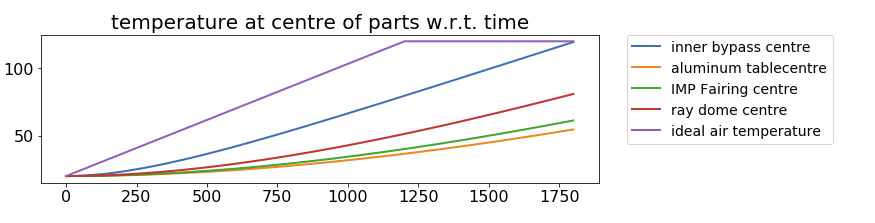

** Attempt 2 - 30 minutes **

| k_P | k_I | k_D|
|-----|-----|----|
|3|1|0.5|

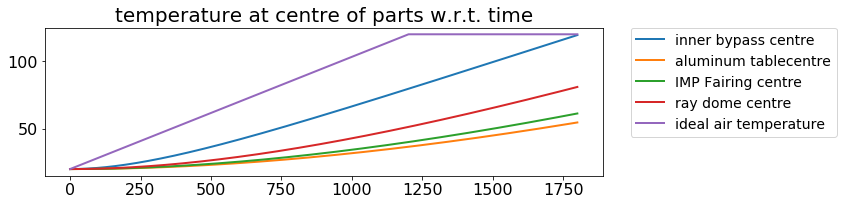

** Attempt 3 - 30 minutes **

| k_P | k_I | k_D|
|-----|-----|----|
|3|2|2|
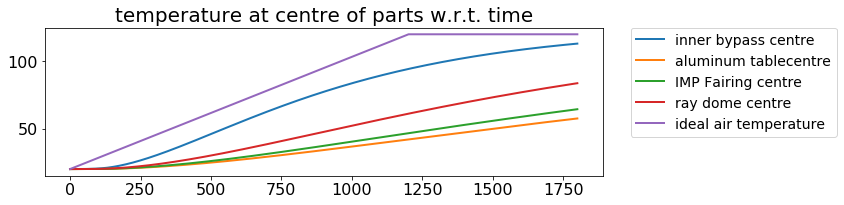

** Attempt 4 - 30 minutes **

| k_P | k_I | k_D|
|-----|-----|----|
|3|3|3|

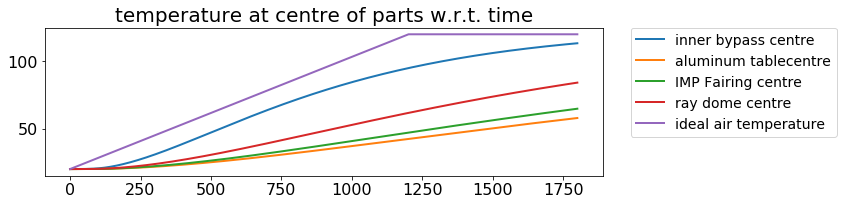

** Attempt 5 - 30 minutes **

| k_P | k_I | k_D|
|-----|-----|----|
|4|2|2|
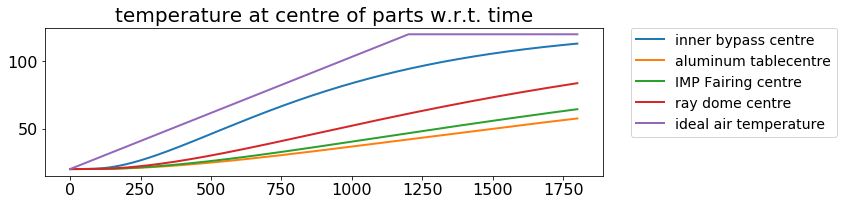

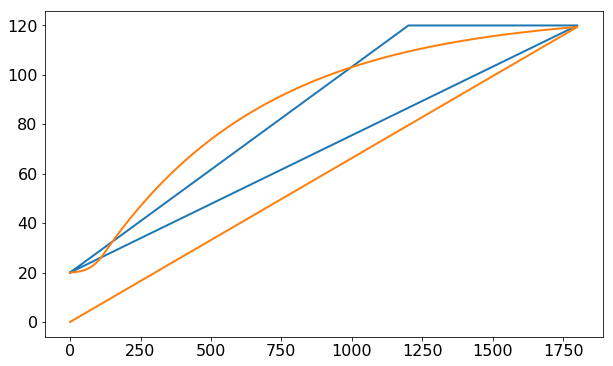

** Attempt 6 - 30 minutes **

| k_P | k_I | k_D|
|-----|-----|----|
|4|2|4|

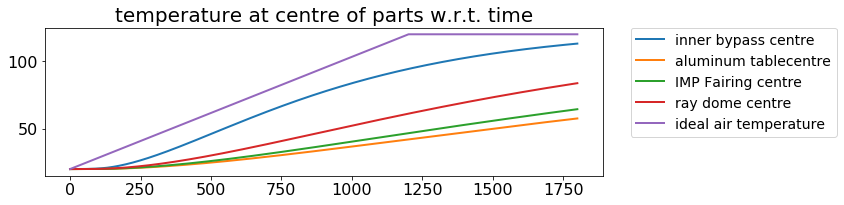

** Attempt 7 - 45 minutes **

| k_P | k_I | k_D|
|-----|-----|----|
|4|4|4|

I believe the integral term might have the greatest effect on the PID
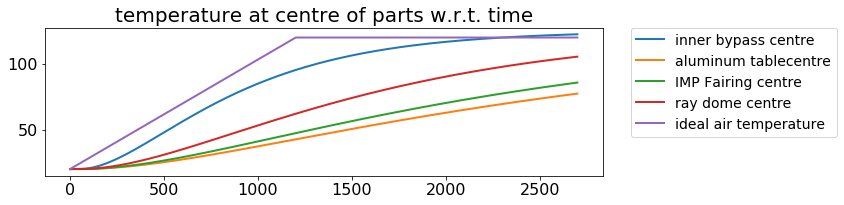

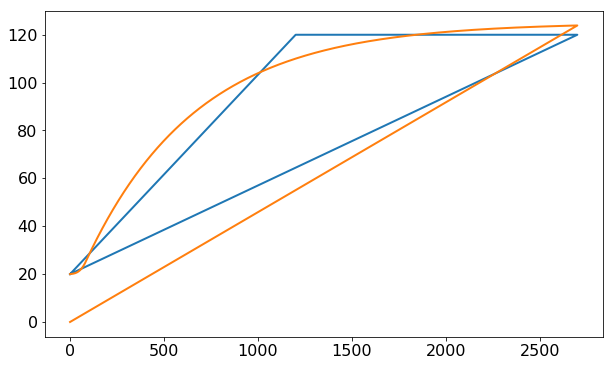

Based off these results, it seems that the time frame that I have been allowing for the run is too short - I'll get a better idea of what's going on if I run it for 1 or 1.5 hours

** Attempt 8 - 1.25 hours **

| k_P | k_I | k_D|
|-----|-----|----|
|4|4|4|

 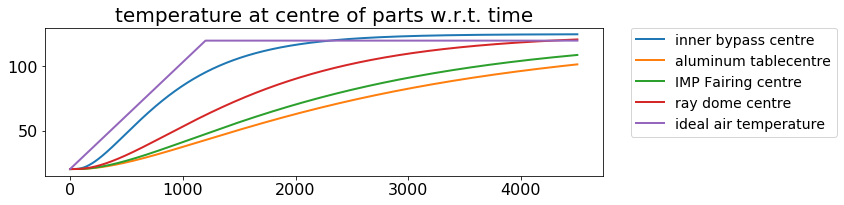

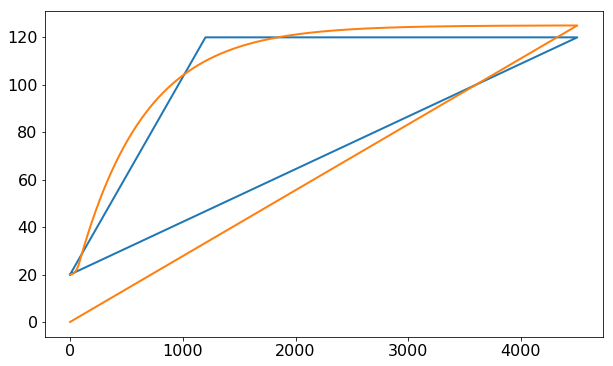

** Attempt 9 - 1.5 hours **


| k_P | k_I | k_D|
|-----|-----|----|
|4|4|4|

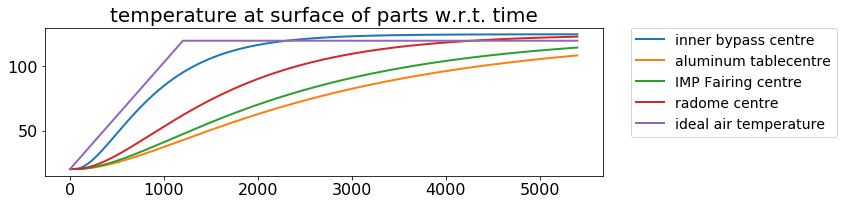

** Attempt 10 - 2 hours **

| k_P | k_I | k_D|
|-----|-----|----|
|4|4|4|

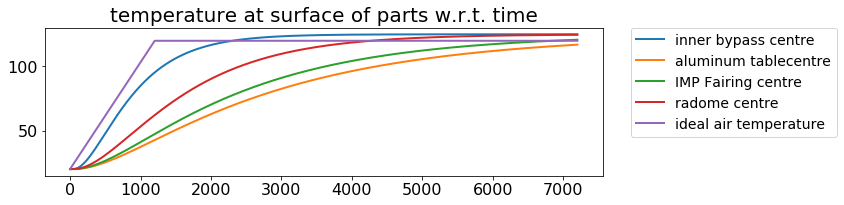

** Attempt 11 - 2 hours **


| k_P | k_I | k_D|
|-----|-----|----|
|5|4|4|

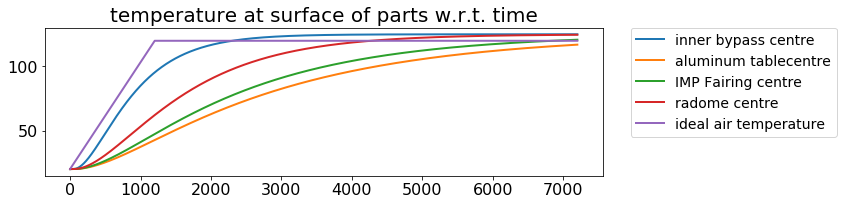

** Attempt 12 - 2 hours **

| k_P | k_I | k_D|
|-----|-----|----|
|5|4|5|

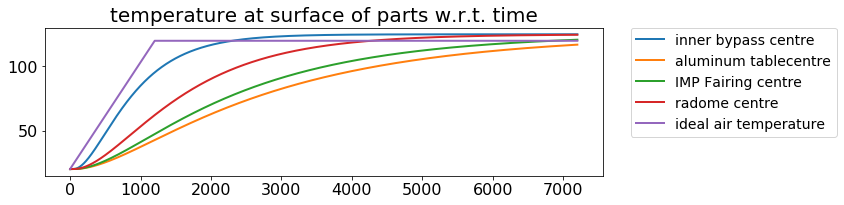

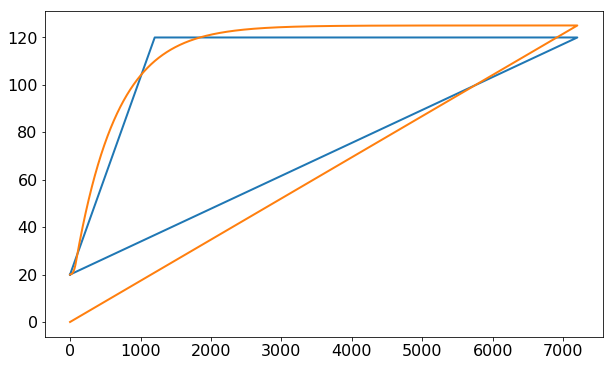

** Attempt 13 - 5 hours **

| k_P | k_I | k_D|
|-----|-----|----|
|4|4|4|

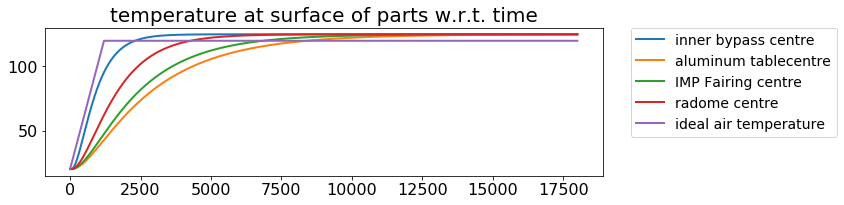

Note: after some time, all the parts are at a temperature higher than the setpoint


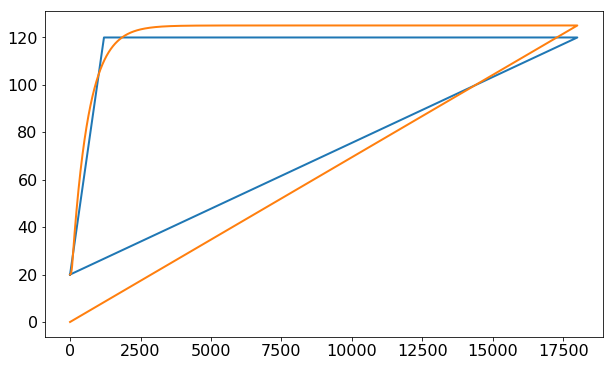

** Attempt 14 - 4 hours (ramp up and down)**

| k_P | k_I | k_D|
|-----|-----|----|
|4|4|4|
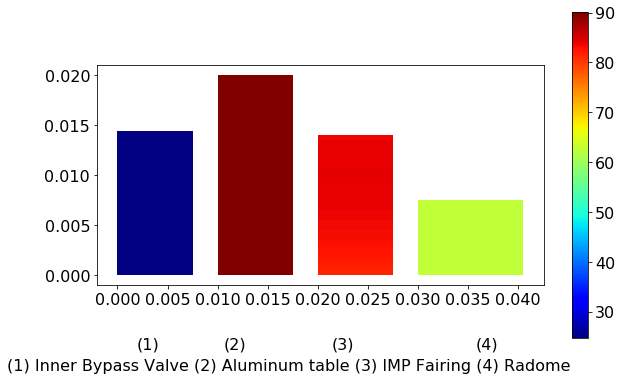

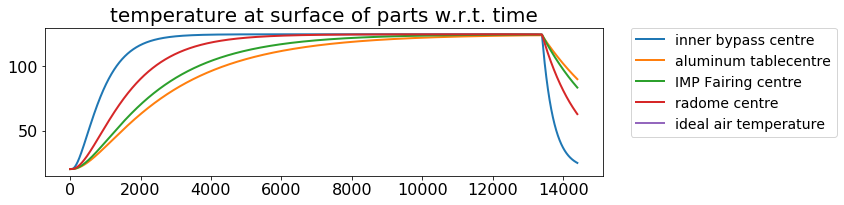

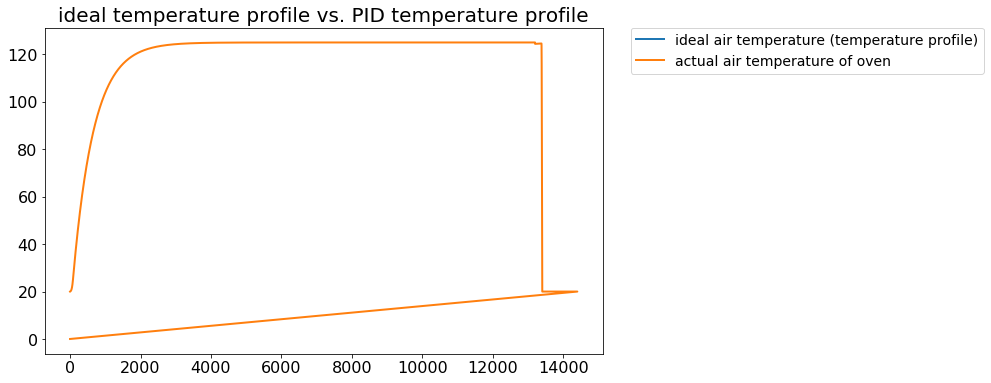